<a href="https://colab.research.google.com/github/EdwinAR99/TalentoTECH-Repo/blob/master/NLP_Keras_TalentoTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORT LIBS

In [22]:
import keras
from keras.layers import Embedding, Flatten, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import requests
from io import StringIO

import matplotlib.pyplot as plt

# INTRODUCTION

In [3]:
frases = [
    'Hola mundo',
    'Hola a todos',
    'Hola a todo el mundo',
    'Buen dia, como estas hoy'
]

In [4]:
#Generate the tokens dictionary
tokenizer = Tokenizer(num_words = 10)
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('word index =', word_index)

word index = {'hola': 1, 'mundo': 2, 'a': 3, 'todos': 4, 'todo': 5, 'el': 6, 'buen': 7, 'dia': 8, 'como': 9, 'estas': 10, 'hoy': 11}


In [5]:
#Generation of tokenized secuence
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias =', secuencias)

secuencias = [[1, 2], [1, 3, 4], [1, 3, 5, 6, 2], [7, 8, 9]]


In [6]:
#Fill the secuences to a uniform length
relleno = pad_sequences(secuencias)
print('rellena =\n', relleno)

rellena =
 [[0 0 0 1 2]
 [0 0 1 3 4]
 [1 3 5 6 2]
 [0 0 7 8 9]]


# IMDB Dataset

In [9]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [10]:
# Checking dataset description
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [11]:
# Sentiment count
print("Total:\n", df['sentiment'].value_counts())

Total:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [12]:
review = []
sentences = list(df['review'])

for sen in sentences:
  review.append(sen)

In [13]:
labels = df['sentiment']
labels = np.array(list(map(lambda x: 1 if x=="positive" else 0, labels)))

In [14]:
train_sen, test_sen, train_lbl, test_lbl = train_test_split(review, labels, test_size=0.2)

In [15]:
# Parameters
vocab_size = 1000
max_lenght = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

In [17]:
# Initialize the tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(train_sen)
word_index = tokenizer.word_index

# Generate and pad the training sentences
sequences = tokenizer.texts_to_sequences(train_sen)
padded = pad_sequences(sequences, maxlen=max_lenght, truncating=trunc_type)

# Generate and pad the test sentences
test_sequences = tokenizer.texts_to_sequences(test_sen)
test_padded = pad_sequences(test_sequences, maxlen=max_lenght, truncating=trunc_type)

In [33]:
# Build the model
model = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_lenght),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [34]:
# Setup the training parameters
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           16000     
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                122944    
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 139009 (543.00 KB)
Trainable params: 139009 (543.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Train the model
history = model.fit(
    padded,
    train_lbl,
    epochs = 20,
    batch_size=64,
    verbose = 1,
    validation_data = (test_padded, test_lbl)
)

Epoch 1/20
625/625 [==============================] - 17s 25ms/step - loss: 0.4925 - accuracy: 0.7423 - val_loss: 0.4296 - val_accuracy: 0.7967
Epoch 2/20
625/625 [==============================] - 3s 5ms/step - loss: 0.3758 - accuracy: 0.8301 - val_loss: 0.4286 - val_accuracy: 0.8011
Epoch 3/20
625/625 [==============================] - 4s 6ms/step - loss: 0.3253 - accuracy: 0.8589 - val_loss: 0.4468 - val_accuracy: 0.7942
Epoch 4/20
625/625 [==============================] - 4s 6ms/step - loss: 0.2746 - accuracy: 0.8865 - val_loss: 0.4995 - val_accuracy: 0.7865
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 0.2248 - accuracy: 0.9111 - val_loss: 0.5668 - val_accuracy: 0.7771
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 0.1773 - accuracy: 0.9334 - val_loss: 0.6442 - val_accuracy: 0.7744
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 0.1324 - accuracy: 0.9535 - val_loss: 0.7655 - val_accuracy: 0.7665
Epoc

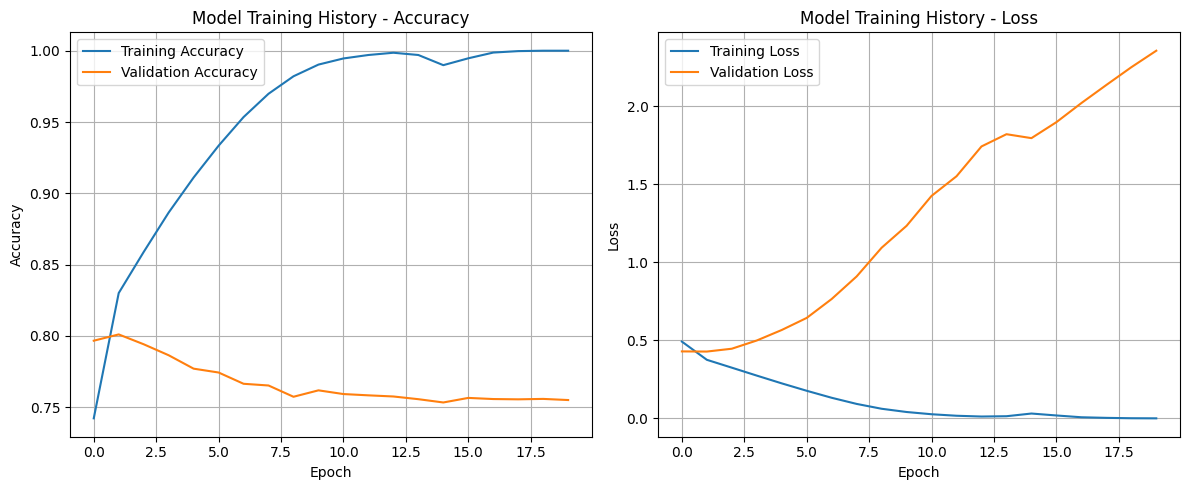

In [36]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graphic the training history - Accuracy
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Training History - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

# Graphic the training history - Loss
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Training History - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()